In [1]:
import json
import pandas as pd
import numpy as np
from os.path import join
from datasets.DatasetFactory import DatasetFactory
from moStress.preprocessing.MoStressPreprocessing import MoStressPreprocessing
from moStress.neuralNetwork.MoStressNeuralNetwork import MoStressNeuralNetwork
from moStress.neuralNetwork.modelHandler.EvaluateModel import EvaluateModel

In [2]:
wesadDataPath =  join("data", "WESAD")
datasetJsonFilePath = join("configs", "wesadDatasetOptions.json")
moStressJsonFilePath = join("configs","moStressConfigs.json")

In [3]:
with open(datasetJsonFilePath, 'r') as j:
        wesadOptions = json.loads(j.read())

with open(moStressJsonFilePath, 'r') as j:
        moStressConfigs = json.loads(j.read())

In [4]:
wesadChestPhysioData = DatasetFactory().make( "Wesad Physio Chest Data", wesadDataPath, wesadOptions["Chest Physio Data"] )

In [5]:
moStressPreprocessing = MoStressPreprocessing(moStressConfigs, wesadChestPhysioData.data)

In [6]:
moStressPreprocessing.execute()

Starting MoStress data preprocessing.

Data Normalization in progress...

Normalization finished.

Windows Labelling in progress...

Windows Labelling finished.

Weights Calculation in progress...

Weights Calculation finished.

MoStress data preprocessing finished.



In [7]:
dataset = {
    "features": moStressPreprocessing.features,
    "targets": moStressPreprocessing.targets,
    "weights": moStressPreprocessing.weights
}

In [8]:
moStressNeuralNetwork = MoStressNeuralNetwork(moStressConfigs, dataset)

2022-08-30 10:46:16.862600: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Starting MoStress with model architecture: REGULARIZER-LSTM and optimizer: rmsprop.


Creating model: REGULARIZER-LSTM

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 420, 128)          68608     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 420, 128)          0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 420, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 420, 128)          0         
_________________________________________________________________
flatten (Flatten)            (None, 53760)             0         
_________________________________________________________________
dense (Dense)                (None, 3)                 161283    
__

2022-08-30 10:46:27.211300: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-08-30 10:46:27.211319: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.
2022-08-30 10:46:27.212817: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.


  1/551 [..............................] - ETA: 22:43 - loss: 1.2655 - sparse_categorical_accuracy: 0.3125

2022-08-30 10:46:29.920021: I tensorflow/core/profiler/lib/profiler_session.cc:99] Profiler session initializing.
2022-08-30 10:46:29.920053: I tensorflow/core/profiler/lib/profiler_session.cc:114] Profiler session started.


  2/551 [..............................] - ETA: 3:47 - loss: 1.3296 - sparse_categorical_accuracy: 0.4062 

2022-08-30 10:46:30.287024: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-08-30 10:46:30.522261: I tensorflow/core/profiler/lib/profiler_session.cc:126] Profiler session tear down.
2022-08-30 10:46:30.748880: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/REGULARIZER-LSTM/rmsprop/fit/20220830-104627/train/plugins/profile/2022_08_30_10_46_30

2022-08-30 10:46:30.884294: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs/REGULARIZER-LSTM/rmsprop/fit/20220830-104627/train/plugins/profile/2022_08_30_10_46_30/C02D602YMD6Q.trace.json.gz
2022-08-30 10:46:31.002254: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs/REGULARIZER-LSTM/rmsprop/fit/20220830-104627/train/plugins/profile/2022_08_30_10_46_30

2022-08-30 10:46:31.002601: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for mem

551/551 [==============================] - 207s 371ms/step - loss: 1.0020 - sparse_categorical_accuracy: 0.7221 - val_loss: 0.2549 - val_sparse_categorical_accuracy: 0.9446

Epoch 00001: saving model to tranningCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 2/100
551/551 [==============================] - 205s 373ms/step - loss: 0.2874 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.0039 - val_sparse_categorical_accuracy: 0.9991

Epoch 00002: saving model to tranningCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 3/100
551/551 [==============================] - 211s 383ms/step - loss: 0.1698 - sparse_categorical_accuracy: 0.9809 - val_loss: 0.0333 - val_sparse_categorical_accuracy: 0.9943

Epoch 00003: saving model to tranningCheckpoint/REGULARIZER-LSTM/rmsprop/cp.ckpt
Epoch 4/100
551/551 [==============================] - 201s 365ms/step - loss: 0.1253 - sparse_categorical_accuracy: 0.9873 - val_loss: 0.4091 - val_sparse_categorical_accuracy: 0.9638

Epoch 00004: saving model

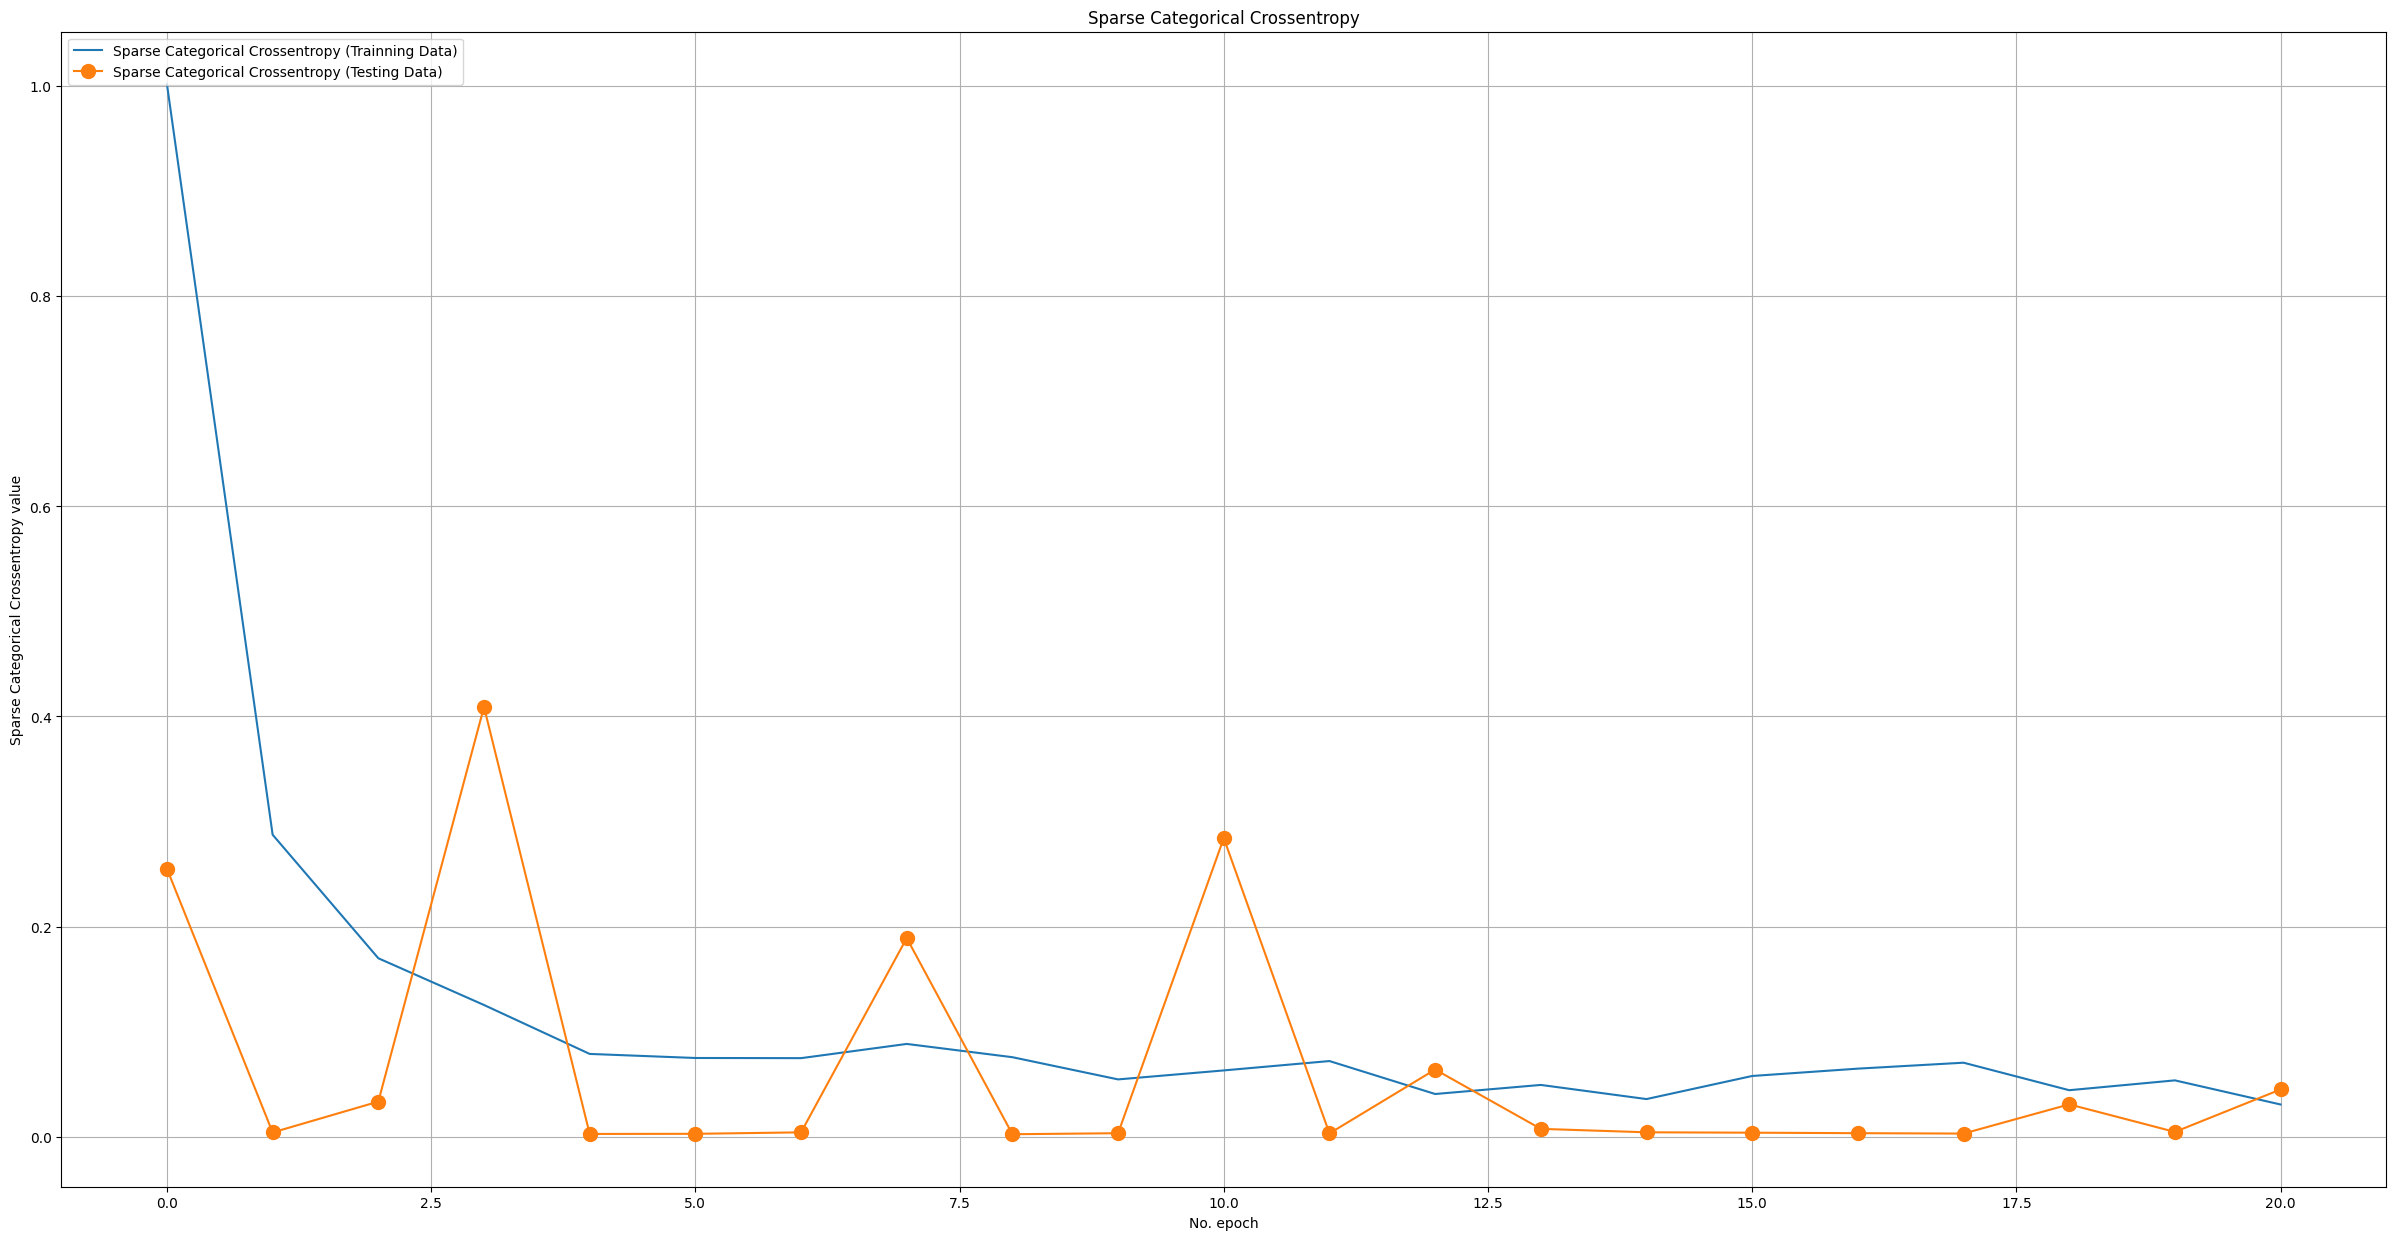

In [9]:
moStressNeuralNetwork.execute()

In [10]:
evaluator = EvaluateModel(
    moStressNeuralNetwork.model,
    moStressNeuralNetwork.modelFullName,
    { "features": moStressPreprocessing.featuresModelValidation, "targets": moStressPreprocessing.targetsModelValidation }
)

Evaluating MoStress with model: REGULARIZER-LSTM-RMSPROP

Classification Report

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      7813
           1       0.54      0.71      0.62      4313
           2       0.25      0.19      0.21      2458

    accuracy                           0.63     14584
   macro avg       0.53      0.54      0.53     14584
weighted avg       0.63      0.63      0.63     14584



Confusion Matrix



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


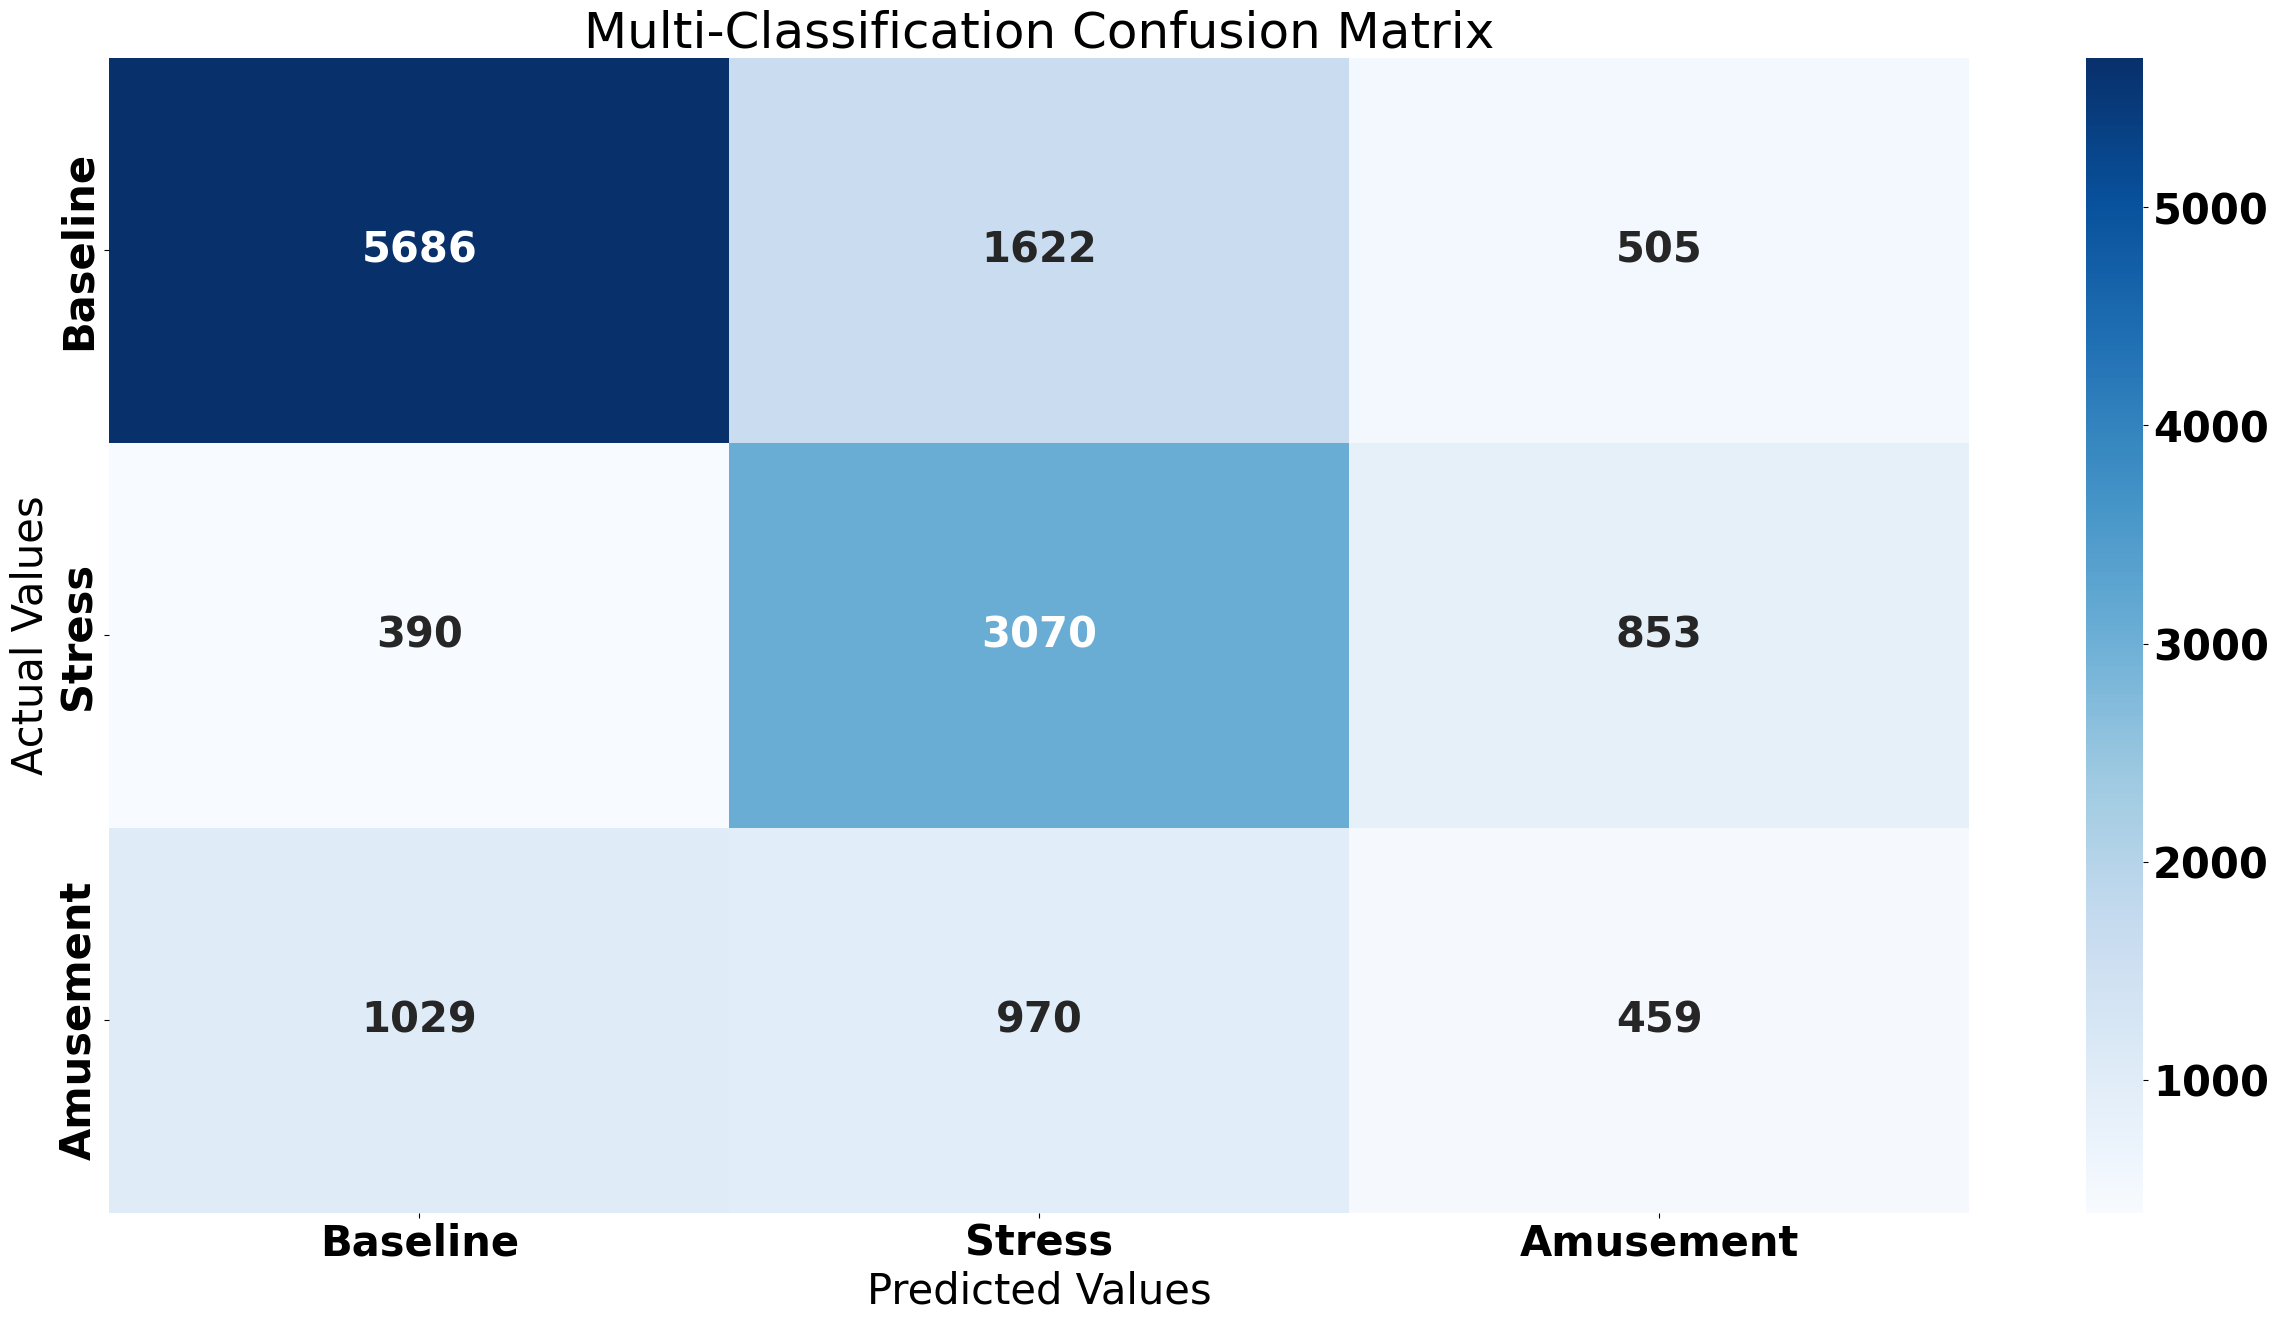

In [11]:
evaluator.executeEvaluation()